In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("all_emotions.csv")
data.drop("Unnamed: 0", axis = 1, inplace = True)
data.head()

,chrome_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,Emotion
0,0.633091,7416.297747,5551.291827,13285.735887,0.002120,0.050476,1
1,0.629568,7135.571471,5653.771579,13191.643371,0.002258,0.052904,1
2,0.619984,7239.265648,5641.048019,13279.137826,0.002707,0.046627,1
3,0.612607,7008.958169,5802.315323,13272.074245,0.002521,0.053835,1
4,0.608243,6997.311810,5518.637359,12649.543486,0.001579,0.045929,2


In [3]:
data['Emotion'].value_counts()

8    192
7    192
6    192
5    192
4    192
3    192
2    192
1     96
Name: Emotion, dtype: int64

In [4]:
data['Emotion'].replace([1,2,3,4,5,6,7,8],[0,0,0,1,1,1,1,1],inplace=True)

In [5]:
print(data['Emotion'].value_counts())
data.isnull().sum()

## No null values

1    960
0    480
Name: Emotion, dtype: int64


chrome_stft           0
spectral_centroid     0
spectral_bandwidth    0
spectral_rolloff      0
rms                   0
zero_crossing_rate    0
Emotion               0
dtype: int64

In [6]:
y = data['Emotion']
X  = data.drop('Emotion', axis = 1)

In [7]:
stats = X.describe(percentiles=[0.005,0.1,0.5,0.95,0.995])
stats

,chrome_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.510108,5560.179301,5054.056185,10841.661162,0.010056,0.069216
std,0.078721,810.351458,568.687643,1503.046336,0.012293,0.018194
min,0.313661,2604.357649,2753.383435,4997.524752,0.000328,0.027717
0.5%,0.338630,3466.714169,3580.707174,7067.841797,0.000492,0.033191
10%,0.401849,4496.379009,4211.973748,8804.885017,0.001661,0.048774
50%,0.512213,5575.320637,5144.059858,11033.019570,0.005693,0.066405
95%,0.635059,6872.654142,5866.470645,13094.623910,0.036313,0.102751
99.5%,0.674390,7300.808950,6150.363477,13732.870027,0.064645,0.129581
max,0.724077,7655.335726,6368.165163,14629.598497,0.088503,0.168519


In [8]:
right_outliers_name = []
right_outliers_value = []

final_outliers = pd.DataFrame()

for i in stats.columns:
            if (stats[i]['max'] / stats[i]['99.5%']) > 1.5:
                right_outliers_name.append(i)
                right_outliers_value.append(outliers[i]['99.5%'])


final_outliers['right_outliers'] = pd.Series(right_outliers_name)
final_outliers['right_outliers_value'] = pd.Series(right_outliers_value)

len(right_outliers_name), len(final_outliers['right_outliers']), len(final_outliers['right_outliers_value'])

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':
c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


(0, 0, 0)

In [9]:
left_outliers_name = []
left_outliers_value = []

for i in stats.columns:
    if (stats[i]['min'] / stats[i]['0.5%']) > 1.5:
        left_outliers_name.append(i)
        left_outliers_value.append(outliers[i]['0.5%'])

final_outliers['left_outliers'] = pd.Series(left_outliers_name)
final_outliers['left_outliers_value'] = pd.Series(left_outliers_value) 

len(left_outliers_name), len(final_outliers['left_outliers']), len(final_outliers['left_outliers_value'])
## Null values have also been counted while counting the length

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


(0, 0, 0)

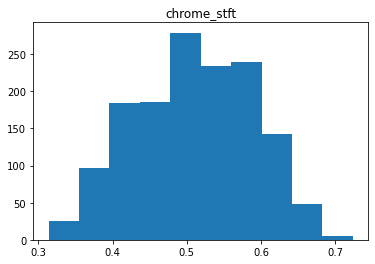

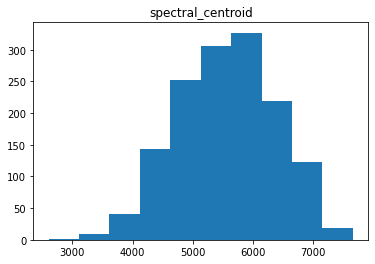

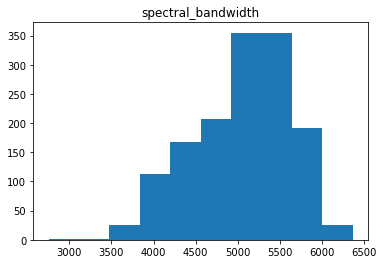

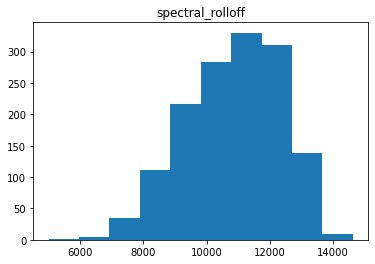

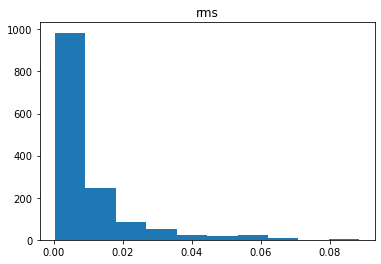

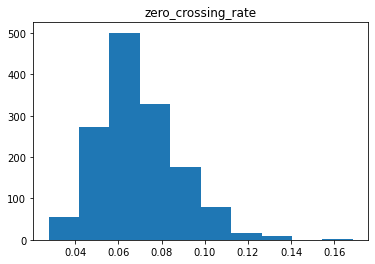

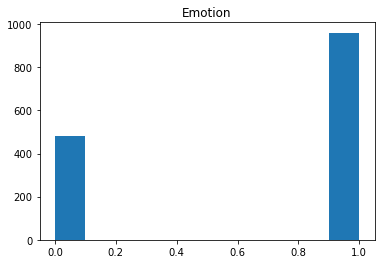

In [10]:
import matplotlib.pyplot as plt
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [11]:
## Transformation

In [12]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and temporary (validation + test) sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.6, random_state=42)


## Modeling

In [13]:
## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your data (X and y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the initial model
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf.predict(X_val)

# Calculate initial metrics
accuracy_initial = accuracy_score(y_val, y_pred)
balanced_accuracy_initial = balanced_accuracy_score(y_val, y_pred)
precision_initial = precision_score(y_val, y_pred, average='micro')
recall_initial = recall_score(y_val, y_pred, average='micro')
f1_initial = f1_score(y_val, y_pred, average='micro')

print("Initial Metrics:")
print(f"Accuracy: {accuracy_initial}")
print(f"Balanced Accuracy: {balanced_accuracy_initial}")
print(f"Precision (Micro-averaged): {precision_initial}")
print(f"Recall (Micro-averaged): {recall_initial}")
print(f"F1 Score (Micro-averaged): {f1_initial}")


Initial Metrics:
Accuracy: 1.0
Balanced Accuracy: 1.0
Precision (Micro-averaged): 1.0
Recall (Micro-averaged): 1.0
F1 Score (Micro-averaged): 1.0


## tuning on validation dataset

In [15]:
def random_search_random_forest(model, X_train, y_train):
    param_dist = {
        'n_estimators': [i for i in range(100, 700, 50)],
        'max_depth': [i for i in range(2, 7, 1)],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Create a randomized search object
    rf_model = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,
        scoring='accuracy',
        cv=3,
        verbose=2
    )

    # Fit the random search model
    rf_model.fit(X_train, y_train)

    print("Best Parameters: ")
    print(rf_model.best_params_)

    return rf_model

# Perform random search for hyperparameter tuning
rf_fine_tune = random_search_random_forest(rf, X_val, y_val)

# Get the best estimator from the random search
rf_fine_tune = rf_fine_tune.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_depth=2, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_depth=2, bootstrap=True, total=   0.6s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_depth=2, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_depth=2, bootstrap=True, total=   0.5s
[CV] n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_depth=2, bootstrap=True 
[CV]  n_estimators=350, min_samples_split=5, min_samples_leaf=4, max_depth=2, bootstrap=True, total=   0.5s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=1, max_depth=3, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=5, min_samples_leaf=1, max_depth=3, bootstrap=True, total=   0.6s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=1, max_depth=3, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=5, min_samples_leaf=1, max_depth=3, bootstrap=True, total=   0.6s
[CV] n_estimators=450, min_samples_split=5, min_samples_leaf=1, max_depth=3, bootstrap=True 
[CV]  n_estimators=450, min_samples_split=5, min_samples_leaf=1, max_depth=3, bootstrap=True, total=   0.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=2, bootstrap=T

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.3min finished


In [16]:
## on valdation dataset

# Make predictions on the test set with the tuned model
y_pred_tuned = rf_fine_tune.predict(X_val)

# Calculate metrics with the tuned model
accuracy_tuned = accuracy_score(y_val, y_pred_tuned)
balanced_accuracy_tuned = balanced_accuracy_score(y_val, y_pred_tuned)
precision_tuned = precision_score(y_val, y_pred_tuned, average='micro')
recall_tuned = recall_score(y_val, y_pred_tuned, average='micro')
f1_tuned = f1_score(y_val, y_pred_tuned, average='micro')

print("\nMetrics after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_tuned}")
print(f"Balanced Accuracy: {balanced_accuracy_tuned}")
print(f"Precision (Micro-averaged): {precision_tuned}")
print(f"Recall (Micro-averaged): {recall_tuned}")
print(f"F1 Score (Micro-averaged): {f1_tuned}")


Metrics after Hyperparameter Tuning:
Accuracy: 0.7658959537572254
Balanced Accuracy: 0.6668408624627414
Precision (Micro-averaged): 0.7658959537572254
Recall (Micro-averaged): 0.7658959537572254
F1 Score (Micro-averaged): 0.7658959537572254


## Scores on test dataset

In [55]:
# Make predictions on the test set with the tuned model
y_pred_tuned = rf_fine_tune.predict(X_test)

# Calculate metrics with the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
balanced_accuracy_tuned = balanced_accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='micro')
recall_tuned = recall_score(y_test, y_pred_tuned, average='micro')
f1_tuned = f1_score(y_test, y_pred_tuned, average='micro')

print("\nMetrics after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_tuned}")
print(f"Balanced Accuracy: {balanced_accuracy_tuned}")
print(f"Precision (Micro-averaged): {precision_tuned}")
print(f"Recall (Micro-averaged): {recall_tuned}")
print(f"F1 Score (Micro-averaged): {f1_tuned}")


Metrics after Hyperparameter Tuning:
Accuracy: 0.7013888888888888
Balanced Accuracy: 0.6081632653061224
Precision (Micro-averaged): 0.7013888888888888
Recall (Micro-averaged): 0.7013888888888888
F1 Score (Micro-averaged): 0.7013888888888888


## XGBoost

In [56]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_val)

[22:52:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Scores on Validation dataset

In [57]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, log_loss, brier_score_loss

# Replace 'true_labels' and 'predicted_labels' with your actual data
true_labels = y_val.values
predicted_labels = y_pred

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision (Micro-averaged): 1.0
Recall (Micro-averaged): 1.0
F1 Score (Micro-averaged): 1.0


## tuning XGBoost on validation dataset

In [58]:
## fine Tuning

from sklearn.model_selection import RandomizedSearchCV
def random_search_xgboost(model, X_train, y_train):
    param_dist = {
    'n_estimators': [i for i in range(100,700,50)],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [i for i in range(2,7,1)]    }

# Create a randomized search object
    xgb_model = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,  
        scoring='accuracy',
        cv=3,  
        verbose=2    )
    
    # Fit the random search model
    xgb_model.fit(X_train, y_train, verbose = False)

    
    print("Best Parameters: ")
    print(xgb_model.best_params_)
    
    return xgb_model

In [59]:
xgb = xgboost.XGBClassifier()

xgb_fine_tune = random_search_xgboost(xgb, X_val, y_val)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=500, max_depth=4, learning_rate=0.001 ..............
[22:52:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  n_estimators=500, max_depth=4, learning_rate=0.001, total=   0.4s
[CV] n_estimators=500, max_depth=4, learning_rate=0.001 ..............
[22:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, learning_rate=0.001, total=   0.3s
[CV] n_estimators=500, max_depth=4, learning_rate=0.001 ..............
[22:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  n_estimators=500, max_depth=4, learning_rate=0.001, total=   0.3s
[CV] n_estimators=100, max_depth=4, learning_rate=0.001 ..............
[22:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  n_estimators=100, max_depth=4, learning_rate=0.001, total=   0.1s
[CV] n_estimators=100,

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   25.7s finished


In [60]:
xgb_fine_tune.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
xgb_fine_tune = xgb_fine_tune.best_estimator_
y_pred_tuned = xgb_fine_tune.predict(X_test)

## Scores on test_dataset

In [62]:
true_labels = y_test
predicted_labels = xgb_fine_tune.predict(X_test)

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.6840277777777778
Balanced Accuracy: 0.590064446831364
Precision (Micro-averaged): 0.6840277777777778
Recall (Micro-averaged): 0.6840277777777778
F1 Score (Micro-averaged): 0.6840277777777778


## Catboost

In [63]:
import catboost
clf = catboost.CatBoostClassifier()
clf.fit(X_train, y_train, verbose = False)
y_pred_tuned_catboost = clf.predict(X_val)


In [64]:
true_labels = y_val
predicted_labels = y_pred_tuned_catboost

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.8815028901734104
Balanced Accuracy: 0.8305074904192312
Precision (Micro-averaged): 0.8815028901734104
Recall (Micro-averaged): 0.8815028901734104
F1 Score (Micro-averaged): 0.8815028901734104


## tuning Catboost

In [65]:
## fine Tuning

from sklearn.model_selection import RandomizedSearchCV
def random_search_catboost(model, X_train, y_train):
    param_dist =  {'iterations': [100,200,300,400,500],
          'depth': [4, 5, 6,7,8,9],
          'loss_function': ['Logloss'],
          'leaf_estimation_iterations': [5,6,7,8,9],
           'eval_metric': ['Logloss'],
          'random_seed': [42],
         'learning_rate':[0.05,0.08,0.1,0.3]
         }  

# Create a randomized search object
    catboost_random = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,  
        scoring='accuracy',
        cv=5,  
        verbose=2    )
    
    # Fit the random search model
    catboost_random.fit(X_train, y_train, verbose = False)
    print("Best Parameters: ")
    print(catboost_random.best_params_)
    
    return catboost_random

In [66]:

clf_grid_full = random_search_catboost(clf, X_val, y_val)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7, total=   1.2s
[CV] random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7, total=   1.1s
[CV] random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7 
[CV]  random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7, total=   1.1s
[CV] random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7 
[CV]  random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7, total=   1.2s
[CV] random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric=Logloss, depth=7 
[CV]  random_seed=42, loss_function=Logloss, learning_rate=0.3, leaf_estimation_iterations=7, iterations=500, eval_metric

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.2min finished


Best Parameters: 
{'random_seed': 42, 'loss_function': 'Logloss', 'learning_rate': 0.1, 'leaf_estimation_iterations': 9, 'iterations': 100, 'eval_metric': 'Logloss', 'depth': 5}


In [67]:
clf_grid_full.best_params_

{'random_seed': 42,
 'loss_function': 'Logloss',
 'learning_rate': 0.1,
 'leaf_estimation_iterations': 9,
 'iterations': 100,
 'eval_metric': 'Logloss',
 'depth': 5}

In [68]:
clf =clf_grid_full.best_estimator_
y_pred_catboost_tuned = clf.predict(X_val)

In [69]:
true_labels = y_val
predicted_labels = y_pred_catboost_tuned

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.869942196531792
Balanced Accuracy: 0.8133975922269965
Precision (Micro-averaged): 0.869942196531792
Recall (Micro-averaged): 0.869942196531792
F1 Score (Micro-averaged): 0.8699421965317921


## on test data

In [70]:
true_labels = y_test
predicted_labels = clf.predict(X_test)

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.71875
Balanced Accuracy: 0.6435553168635875
Precision (Micro-averaged): 0.71875
Recall (Micro-averaged): 0.71875
F1 Score (Micro-averaged): 0.71875


## Conformal Prediction
        -- ## lets go with CATBOOST



In [71]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

cat_train = clf.predict_proba(X_train)[:,1]
cat_test = clf.predict_proba(X_test)[:,1]

lr_model = LogisticRegression()
lr_model.fit(cat_train.reshape(-1,1),y_train)

cat_test_calibrated = lr_model.predict_proba(cat_test.reshape(-1,1))[:,1]


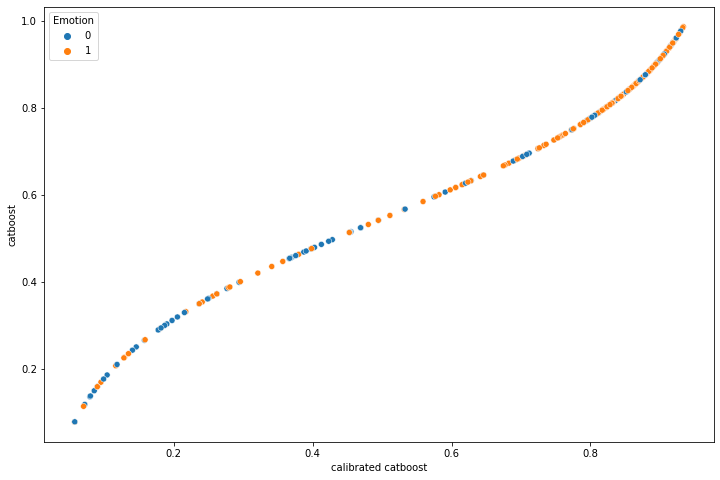

Text(0.5, 1.0, 'Catboost Calibrated scores')

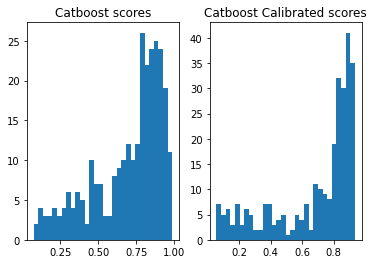

In [72]:

fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=cat_test_calibrated, y=cat_test, hue=y_test,)
plt.xlabel("calibrated catboost")
plt.ylabel("catboost")
plt.show()

plt.subplot(1,2,1)
plt.hist(cat_test, bins = 30)
plt.title("Catboost scores")

plt.subplot(1,2,2)
plt.hist(cat_test_calibrated, bins = 30)
plt.title("Catboost Calibrated scores")

## KS Chart

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def ks_chart(probs, y):

    class0 = y[y == 0]
    class1 = y[y == 1]
    prob0 = probs[:,0]
    prob1 = probs[:,1]
    
    ks = ks_2samp(prob0, prob1)
    
    prob0 = np.sort(prob0)
    prob1 = np.sort(prob1)
    prob0_cdf = np.cumsum(prob0)
    prob1_cdf = np.cumsum(prob1)
    prob0_cdf = prob0_cdf / prob0_cdf[-1]
    prob1_cdf = prob1_cdf / prob1_cdf[-1]
    
    ks_statistic = ks.statistic
    
    # Plot
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=prob0, y=prob0_cdf, label="prob0")
    sns.lineplot(x=prob1, y=prob1_cdf, label="prob1")
    plt.xlabel("Probabilities")
    plt.ylabel("CDF")
    plt.title(f"Kolmogorov-Smirnov Chart\nKS Statistic: {ks_statistic:.4f}")
    
    plt.show()

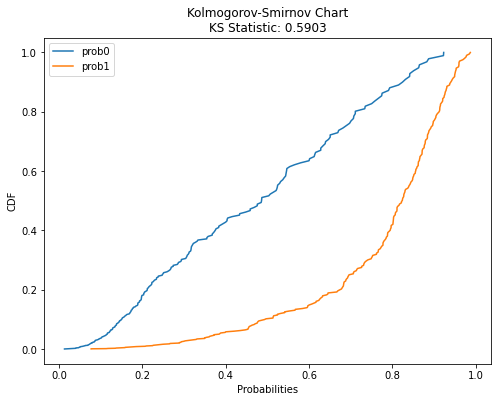

In [74]:
ks_chart(clf.predict_proba(X_test), y_test)

## Emperical Probability Chart

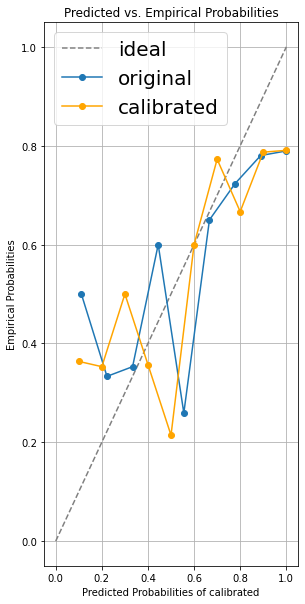

In [75]:
predicted_probabilities = cat_test
observed_outcomes = y_test

num_bins = 10

# Calculate empirical probabilities for each predicted probability bin
bins = np.linspace(0, 1, num_bins)
empirical_probs = []
for i in range(1, num_bins):
    mask = (predicted_probabilities >= bins[i - 1]) & (predicted_probabilities < bins[i])
    if np.any(mask):
        empirical_probs.append(np.mean(observed_outcomes[mask]))
    else:
        empirical_probs.append(0)  # Handle empty bins

# Create the plot
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.plot(bins[1:], empirical_probs, marker='o', linestyle='-')
plt.xlabel('Predicted Probabilities of catboost')
plt.ylabel('Empirical Probabilities')
plt.title('Predicted vs. Empirical Probabilities')
plt.grid(True)

###################################################################################
predicted_probabilities = cat_test_calibrated
observed_outcomes = y_test

num_bins = 11

# Calculate empirical probabilities for each predicted probability bin
bins = np.linspace(0, 1, num_bins)
empirical_probs = []
for i in range(1, num_bins):
    mask = (predicted_probabilities >= bins[i - 1]) & (predicted_probabilities < bins[i])
    if np.any(mask):
        empirical_probs.append(np.mean(observed_outcomes[mask]))
    else:
        empirical_probs.append(0)  # Handle empty bins

        
plt.plot(bins[1:], empirical_probs, marker='o', linestyle='-', color='orange')
plt.xlabel('Predicted Probabilities of calibrated')
plt.ylabel('Empirical Probabilities')
plt.title('Predicted vs. Empirical Probabilities')
plt.grid(True)
plt.legend(['ideal','original', 'calibrated'], fontsize=20)

## more plots

In [76]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


def calibration_plots(true, prob, title):
    """
    Plots calibration curves for a given probability and true labels.
    """

    calibration_curve_values = []
    for i in range(2):
        curve = calibration_curve(
            y_true=true == i,
            y_prob=prob[:, i],
            n_bins=10,
        )
        calibration_curve_values.append(curve)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for i in range(2):
        ax[i].plot(
            calibration_curve_values[i][1], calibration_curve_values[i][0], marker="o"
        )
        ax[i].plot([0, 1], [0, 1], linestyle="--", color="black")
        ax[i].set_title(f"Class {i}")
        ax[i].set_xlabel("Predicted probability")
        ax[i].set_ylabel("True probability")

    fig.suptitle(title)

    plt.tight_layout()
    plt.show()

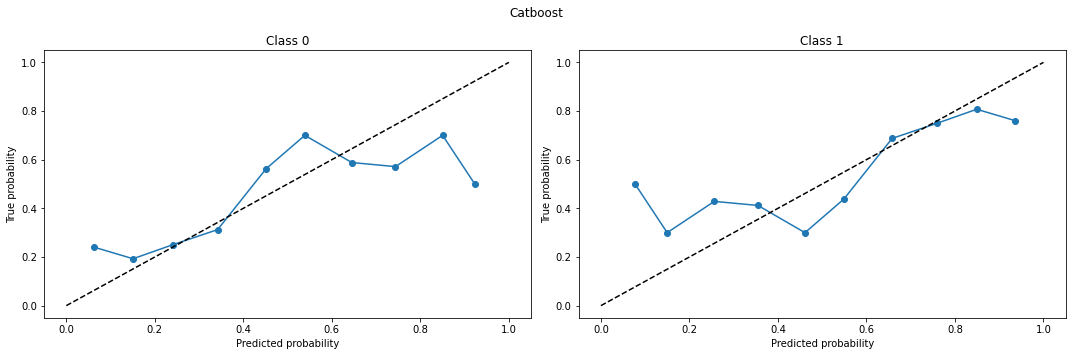

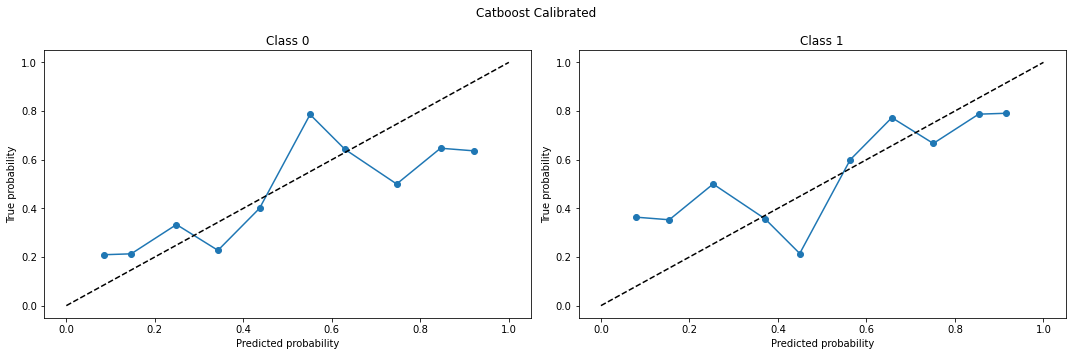

In [77]:
calibration_plots(y_test, clf.predict_proba(X_test), "Catboost")
calibrated_probs = lr_model.predict_proba(clf.predict_proba(X_test)[:,1].reshape(-1, 1))
calibration_plots(y_test, calibrated_probs, "Catboost Calibrated")